In [47]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

In [103]:
import numpy as np
import torch
from torch import nn
from tqdm import tqdm
import random
from inspect import signature
import sys
sys.path.append("../")
sys.path.append("../metrics/")
sys.path.append("../artifacts")

from synthetic_artifacts_1c import SyntheticArtifiactsLabeled1c
from metrics_utils import save_checkpoint_metrics
from utils import reduce_channel_batch
from data import normalize, EEGDatasetMc
from models import *
from constants import *

In [189]:
target_artifacts = {
		"no signal": False,
		"60hz noise": False,
		"blink": True
	}
blinks = SyntheticArtifiactsLabeled1c(20, length=784, target_artifacts=target_artifacts, normalize=normalize, label=False)

def distort_channel_batch(signals, distorted_channel_index):
	for i in range(signals.shape[0]):
		cur_blinks = (blinks[random.randint(0,19)][0]).cuda()
		signals[i][distorted_channel_index] = (signals[i][distorted_channel_index] + cur_blinks) / 2
	return signals

../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digi

../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  add_eog(x)
../artifacts/mne_synthetic_artifacts.py:19: RuntimeWarning: (X, Y) fit (0.6,

## Denoising VAE

In [190]:
save_filename = "/mnt/home2/dlongo/neuralFill/denoise/saved_runs/1596748797/"
model = torch.load(save_filename + "model.pt")
model.eval()

VAE1c(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=30, bias=True)
  (fc22): Linear(in_features=400, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)

In [191]:
dataset = EEGDatasetMc(TRAIN_NORMAL_FILES_CSV, max_num_examples=-1, length=784, normalize=normalize, select_channels=[0])
i = 0

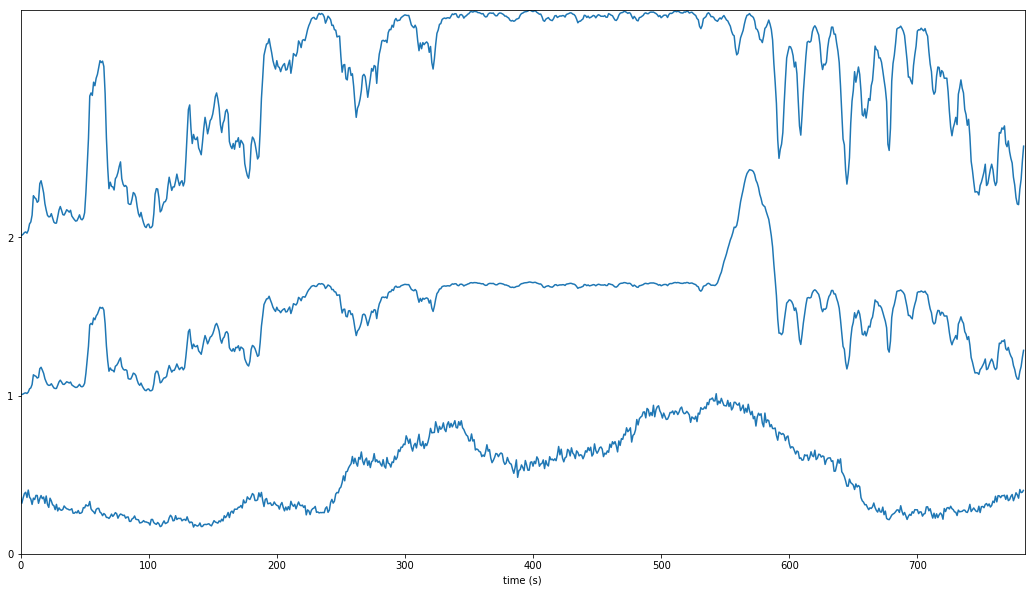

In [213]:
i += 1
example = dataset[i]
original = example
example = example.view(1, 1, -1).cuda()
noisy = distort_channel_batch(example, 0)
cleaned = model(noisy)[0]
cleaned = cleaned.detach().cpu()
noisy = noisy.cpu()
combined = np.vstack((cleaned.view(-1), noisy.view(-1), original.view(-1)))
stacklineplot.stackplot(combined)
    

### 60hz Noise

In [91]:
samples = np.load("../denoise/results_fill/sample-train-200.npy")

In [92]:
def plot_example(signals, i):
    original = signals[i]
    noisy = signals[i + int(signals.shape[0]/3)]
    cleaned = signals[i + int(2*(signals.shape[0]/3))]
    combined = np.vstack((cleaned, noisy, original))
    stacklineplot.stackplot(combined)

In [93]:
i = 0

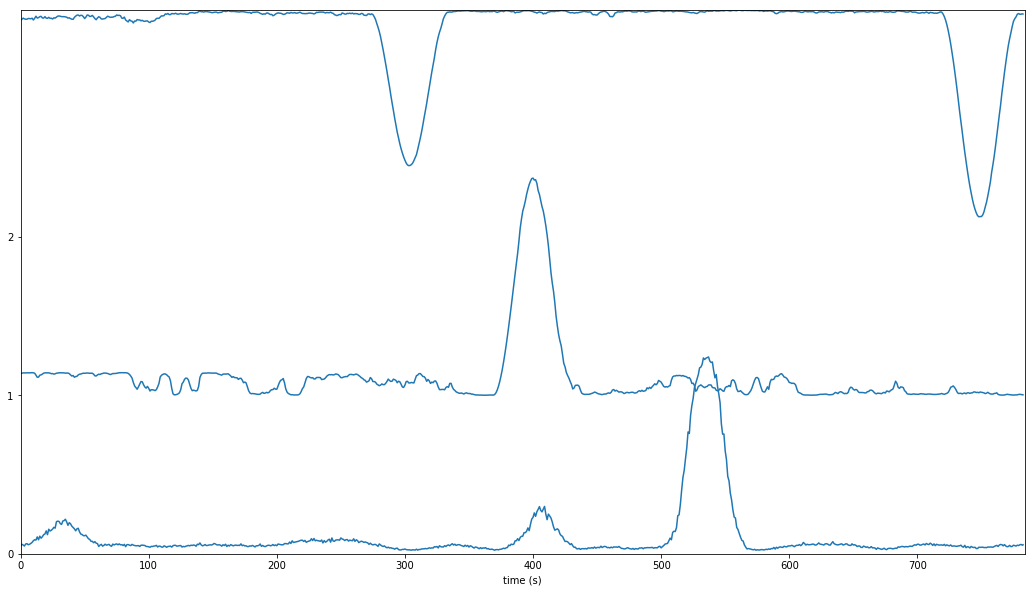

In [94]:
i += 1
plot_example(samples, i)

#### Original

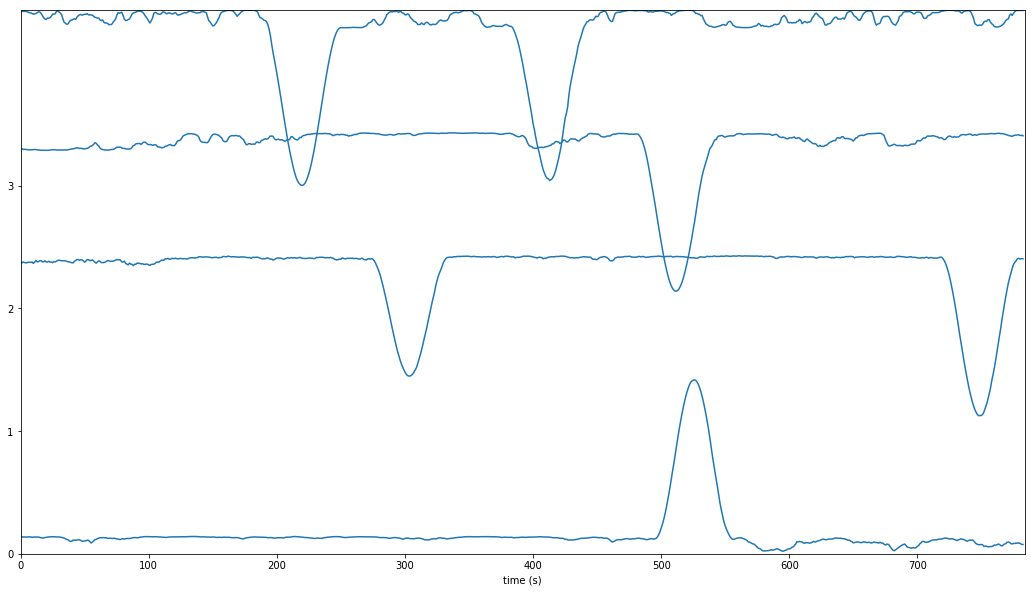

In [95]:
stacklineplot.stackplot(samples[:4])

#### Noisy

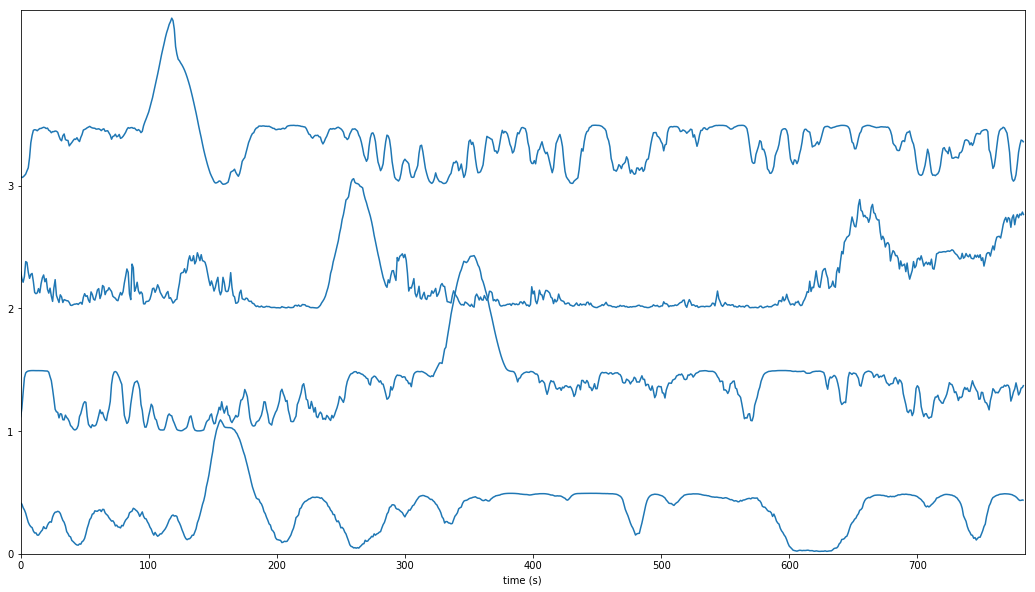

In [89]:
stacklineplot.stackplot(samples[8:8+4])

#### Denoise

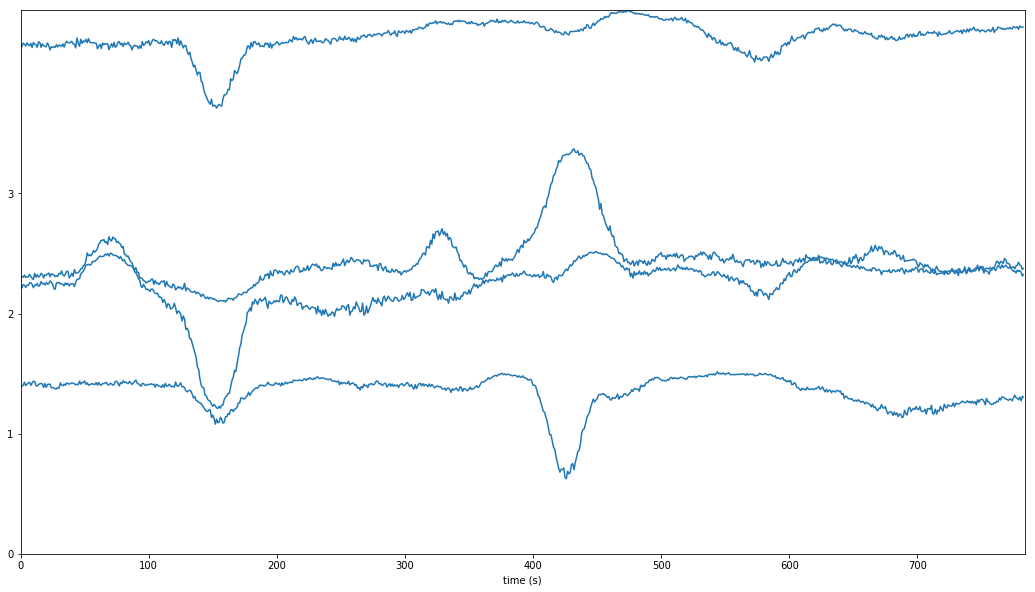

In [90]:
stacklineplot.stackplot(samples[16:16+4])

### Blink Artifact

In [41]:
blink_samples = np.load("../denoise/results_denoise/1000_blink_eval_recon.npy")

#### Original

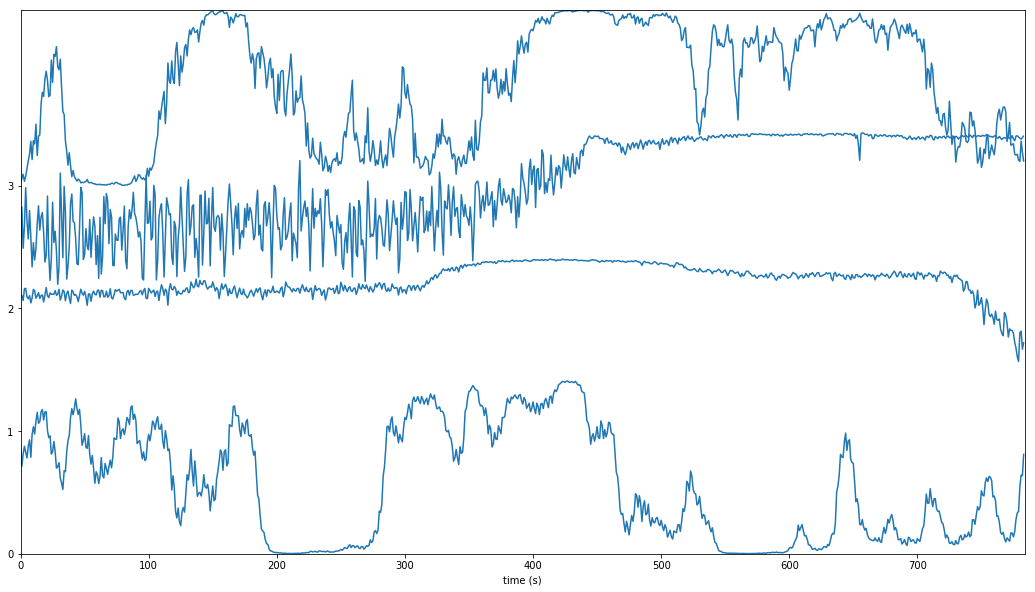

In [42]:
stacklineplot.stackplot(blink_samples[:4], yscale=1)

#### Blinks Added

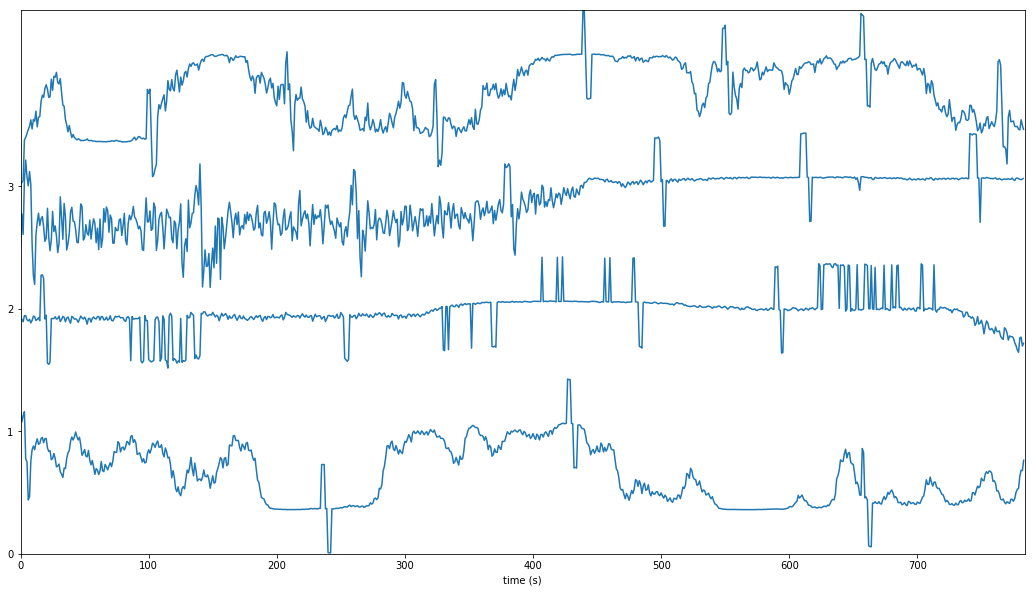

In [43]:
stacklineplot.stackplot(blink_samples[16:16+4], yscale=1)

#### Denoise

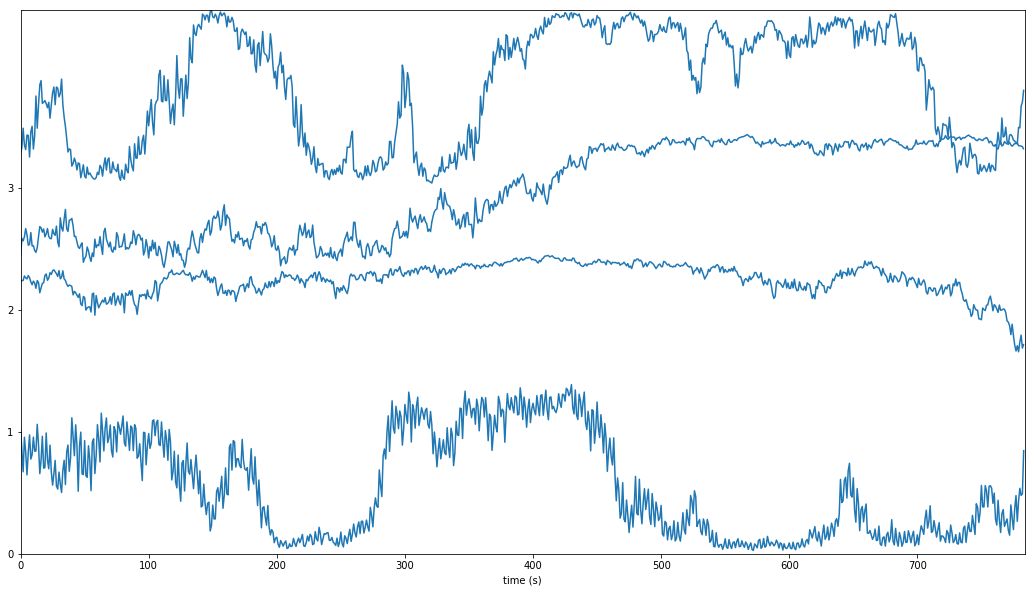

In [44]:
stacklineplot.stackplot(blink_samples[16*2:16*2+4], yscale=1)